In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

# Data Loading

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load a DataFrame with a specific version of a CSV
df: pd.DataFrame = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shiveshprakash/34-year-daily-stock-data/versions/1",
    "stock_data.csv",
)

# Drop useless columns or that we'll create ourselves
df = df.drop(columns=["prev_day"])

# Display the first few rows of the dataframe
df.head()

,dt,vix,sp500,sp500_volume,djia,djia_volume,hsi,ads,us3m,joblessness,epu,GPRD
0,1990-01-03,18.19,358.760010,192330000.0,2809.73,23.62,2858.699951,-0.229917,7.89,3,100.359178,75.408051
1,1990-01-04,19.22,355.670013,177000000.0,2796.08,24.37,2868.000000,-0.246065,7.84,3,100.359178,56.085804
2,1990-01-05,20.11,352.200012,158530000.0,2773.25,20.29,2839.899902,-0.260393,7.79,3,100.359178,63.847675
3,1990-01-08,20.26,353.790009,140110000.0,2794.37,16.61,2816.000000,-0.291750,7.79,3,100.359178,102.841156
4,1990-01-09,22.20,349.619995,155210000.0,2766.00,15.80,2822.000000,-0.297326,7.80,3,100.359178,138.435669


# Data Cleaning and Preprocessing

In [3]:
# Check for missing values
df.isnull().sum()

dt              0
vix             0
sp500           0
sp500_volume    0
djia            0
djia_volume     0
hsi             0
ads             0
us3m            0
joblessness     0
epu             0
GPRD            0
dtype: int64

In [4]:
# Convert "dt" to datetime format
df["dt"] = pd.to_datetime(df["dt"], format="%Y-%m-%d")

# Check data types
df.dtypes

dt              datetime64[ns]
vix                    float64
sp500                  float64
sp500_volume           float64
djia                   float64
djia_volume            float64
hsi                    float64
ads                    float64
us3m                   float64
joblessness              int64
epu                    float64
GPRD                   float64
dtype: object

# Data Analysis

### General Plots

In [5]:
import os

# Specify the exact folder path where you want to save the image
output_folder = "./plots/analysis"  # 🔹 Replace with your desired folder path

# Ensure the folder exists
os.makedirs(output_folder, exist_ok=True)  # 🔹 Creates the folder if it doesn't exist

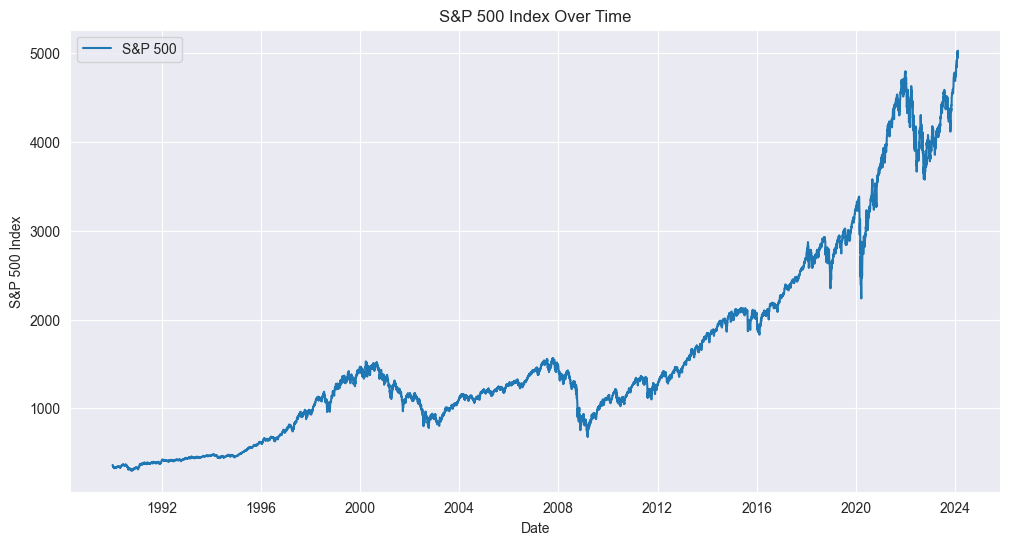

In [6]:
# Plot the S&P 500 over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["dt"], y=df["sp500"], label="S&P 500")
plt.title("S&P 500 Index Over Time")
plt.xlabel("Date")
plt.ylabel("S&P 500 Index")
plt.legend()
# Define the save path
output_path = os.path.join(output_folder, "sp500_over_time.png")
# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

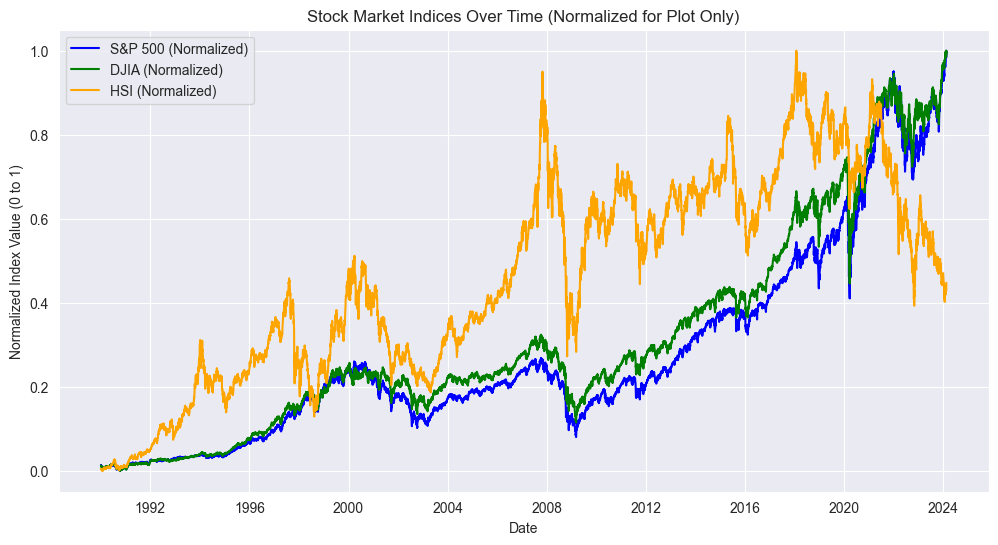

Plot saved successfully at: ./plots/analysis\normalized_stock_indices.png


In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize only for plotting (without modifying the DataFrame)
sp500_norm = scaler.fit_transform(df[['sp500']])
djia_norm = scaler.fit_transform(df[['djia']])
hsi_norm = scaler.fit_transform(df[['hsi']])

# Plot the normalized stock indices over time
plt.figure(figsize=(12, 6))
plt.plot(df['dt'], sp500_norm, label='S&P 500 (Normalized)', color='blue')
plt.plot(df['dt'], djia_norm, label='DJIA (Normalized)', color='green')
plt.plot(df['dt'], hsi_norm, label='HSI (Normalized)', color='orange')

# Add title and labels
plt.title('Stock Market Indices Over Time (Normalized for Plot Only)')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value (0 to 1)')
plt.legend()
plt.grid(True)

# Define file path for saving the plot
output_path = os.path.join(output_folder, "normalized_stock_indices.png")

# Save the plot as an image
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved successfully at: {output_path}")


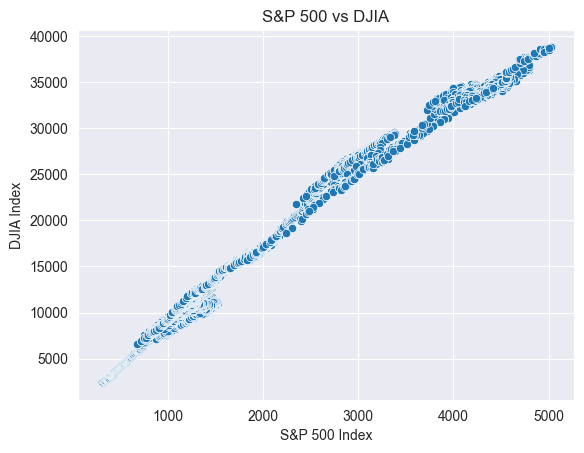

In [8]:
# Visualize the relationship between S&P 500 and DJIA
sns.scatterplot(x="sp500", y="djia", data=df)
plt.title("S&P 500 vs DJIA")
plt.xlabel("S&P 500 Index")
plt.ylabel("DJIA Index")
# Define the save path
output_path = os.path.join(output_folder, "sp500_vs_djia.png")

# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

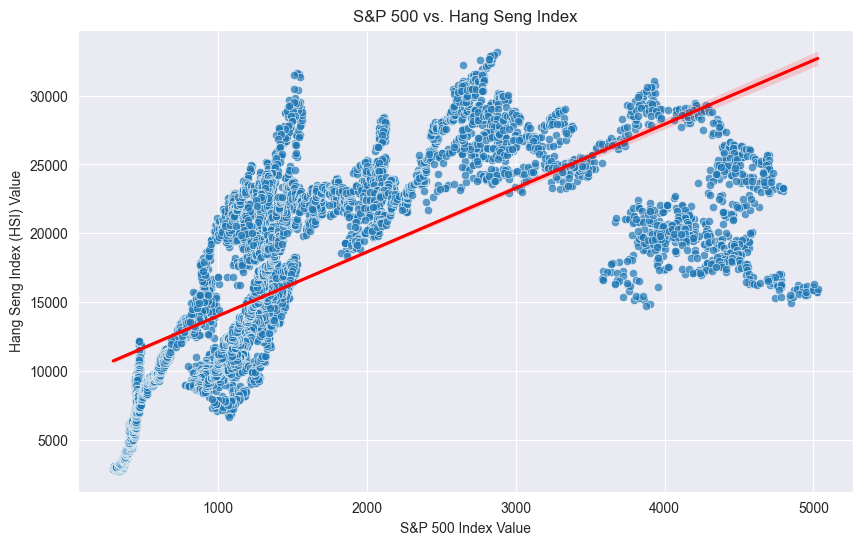

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot of S&P 500 vs. HSI
sns.scatterplot(data=df, x='sp500', y='hsi', alpha=0.7)

# Regression line (without scatter points)
sns.regplot(data=df, x='sp500', y='hsi', scatter=False, color='red')

# Labels and Title
plt.title('S&P 500 vs. Hang Seng Index')
plt.xlabel('S&P 500 Index Value')
plt.ylabel('Hang Seng Index (HSI) Value')
plt.grid(True)
# Define the save path
output_path = os.path.join(output_folder, "sp500_vs_hsi.png")

# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


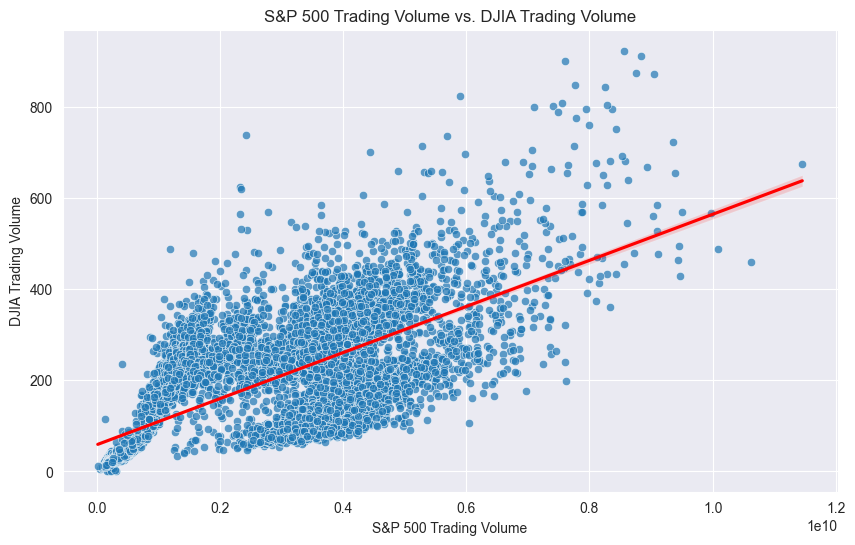

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sp500_volume', y='djia_volume', alpha=0.7)
sns.regplot(data=df, x='sp500_volume', y='djia_volume', scatter=False, color='red')
plt.title('S&P 500 Trading Volume vs. DJIA Trading Volume')
plt.xlabel('S&P 500 Trading Volume')
plt.ylabel('DJIA Trading Volume')
plt.grid(True)
# Define the save path
output_path = os.path.join(output_folder, "sp500_volume_vs_djia_volume.png")

# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


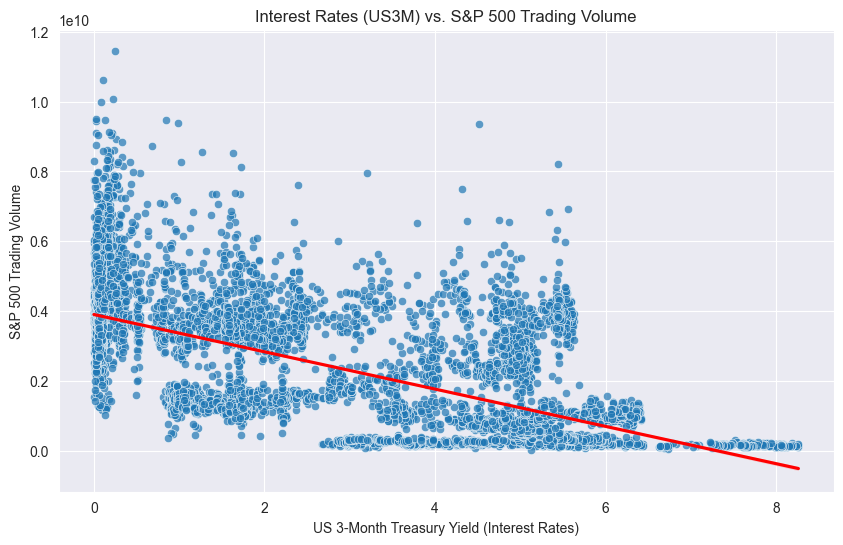

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='us3m', y='sp500_volume', alpha=0.7)
sns.regplot(data=df, x='us3m', y='sp500_volume', scatter=False, color='red')
plt.title('Interest Rates (US3M) vs. S&P 500 Trading Volume')
plt.xlabel('US 3-Month Treasury Yield (Interest Rates)')
plt.ylabel('S&P 500 Trading Volume')
plt.grid(True)
# Define the save path
output_path = os.path.join(output_folder, "us3m_vs_sp500_volume.png")

# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


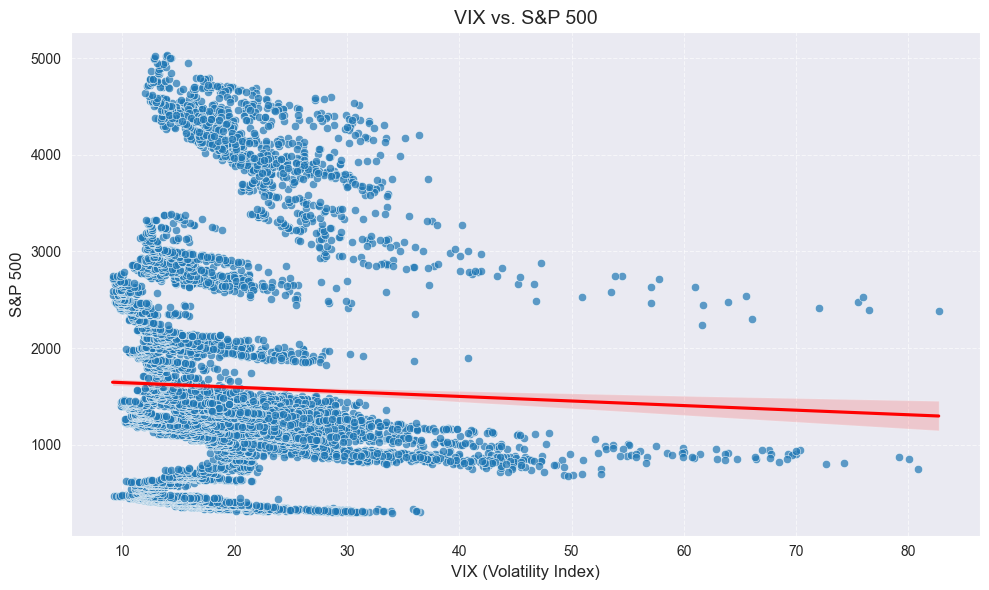

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vix', y='sp500', alpha=0.7)
sns.regplot(data=df, x='vix', y='sp500', scatter=False, color='red')
plt.title('VIX vs. S&P 500', fontsize=14)
plt.xlabel('VIX (Volatility Index)', fontsize=12)
plt.ylabel('S&P 500', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# Define the save path
output_path = os.path.join(output_folder, "vix_vs_sp500.png")

# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


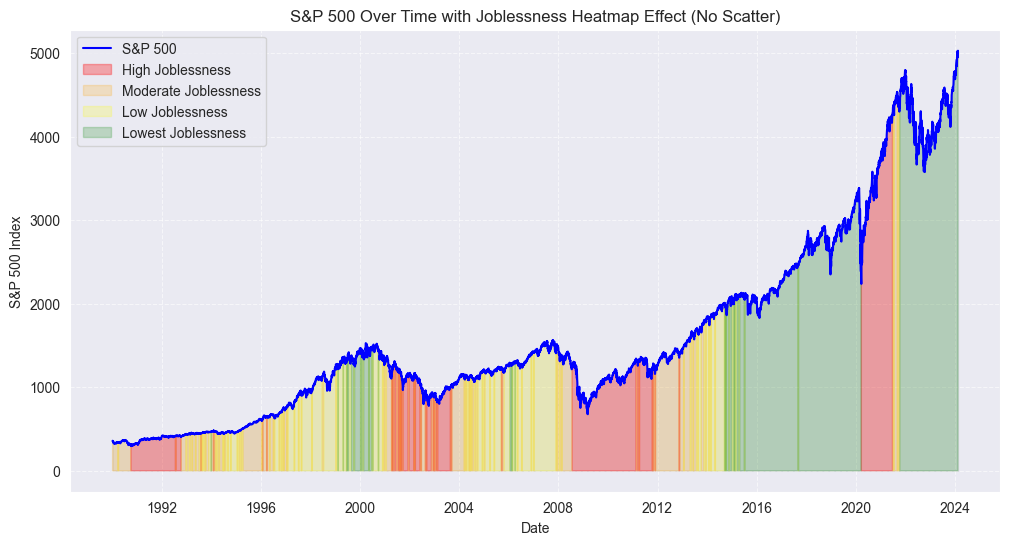

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot S&P 500 as a line
plt.plot(df['dt'], df['sp500'], label='S&P 500', color='blue', linewidth=1.5)

# Create a heatmap effect using background shading
plt.fill_between(df['dt'], df['sp500'], color='gray', alpha=0.1)  # Light shading as a base
plt.fill_between(df['dt'], df['sp500'], where=(df['joblessness'] == 4), color='red', alpha=0.3,
                 label="High Joblessness")
plt.fill_between(df['dt'], df['sp500'], where=(df['joblessness'] == 3), color='orange', alpha=0.2,
                 label="Moderate Joblessness")
plt.fill_between(df['dt'], df['sp500'], where=(df['joblessness'] == 2), color='yellow', alpha=0.2,
                 label="Low Joblessness")
plt.fill_between(df['dt'], df['sp500'], where=(df['joblessness'] == 1), color='green', alpha=0.2,
                 label="Lowest Joblessness")

# Labels and Title
plt.title('S&P 500 Over Time with Joblessness Heatmap Effect (No Scatter)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
# Define the save path
output_path = os.path.join(output_folder, "sp500_joblessness_heatmap.png")

# Save the plot
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


### Correlation Analysis

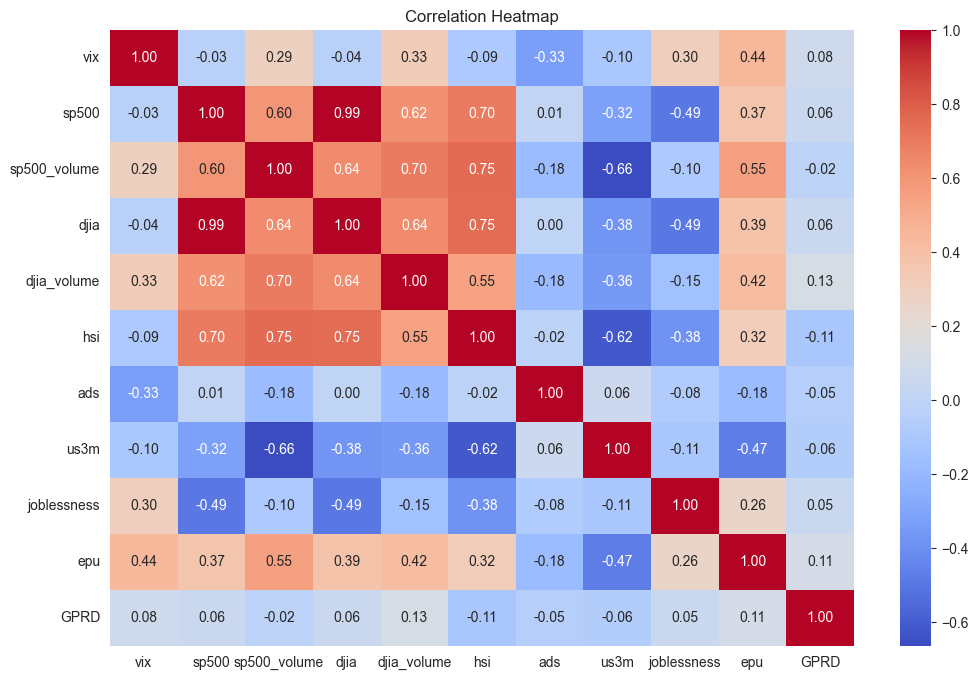

Heatmap saved successfully at: ./plots/analysis\correlation_heatmap.png


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")

# Define the file path to save the image
output_path = os.path.join(output_folder, "correlation_heatmap.png")

# Save the heatmap as an image
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

print(f"Heatmap saved successfully at: {output_path}")


# Conclusion and Future Work
...